In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Amazon_reviews_after_sentiment.csv')

In [3]:
df['Text'] = df['Text'].astype(str)

### Create document term matrix with TF-IDF

### Split Train and Test data

In [4]:
y= df.Good_reviews.values 
X= df.Text

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state = 820) 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(263605,) (263605,)
(129836,) (129836,)


### Convert reviews to a matrix of TF-IDF features

In [5]:
tfi = TfidfVectorizer(ngram_range=(1,3), max_features = 2000)

X_train_tfi = tfi.fit_transform(X_train).toarray() 
X_test_tfi = tfi.transform(X_test).toarray()

### Naive Bayes with Gaussian Method

In [18]:
# Fitting naive bayes to the training set with Gaussian Method
classifier_GNB = GaussianNB() 
classifier_GNB.fit(X_train_tfi, y_train) 
cv_gaussian= classifier_GNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_GNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[23202,  5250],
       [25313, 76071]])

Text(91.68, 0.5, 'Predicted label')

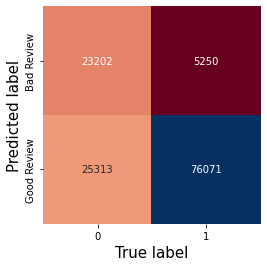

In [19]:
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' gets rid of numbers like 1.8e + 02xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [20]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.76
Precision score: 0.94
Recall score: 0.75
F1 score: 0.76


### MultinomialNB

In [9]:
# Fitting naive bayes to the training set with Multinomial Method
classifier_MNB = MultinomialNB()
classifier_MNB.fit(X_train_tfi, y_train) 
cv_mn = classifier_MNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_MNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[  7055,  21397],
       [   918, 100466]])

Text(91.68, 0.5, 'Predicted label')

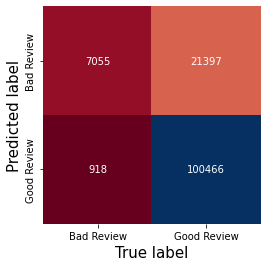

In [10]:
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [12]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.83
Precision score: 0.82
Recall score: 0.99
F1 score: 0.83


### BernoulliNB

In [10]:
classifier_BNB = BernoulliNB()
classifier_BNB.fit(X_train_tfi, y_train) 
cv_ber= classifier_BNB.fit(X_train_tfi, y_train) # This will be used later for model comparison
  
# predicting test set results 
y_pred = classifier_BNB.predict(X_test_tfi) 
  
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
cm

array([[17966, 10486],
       [10888, 90496]])

Text(91.68, 0.5, 'Predicted label')

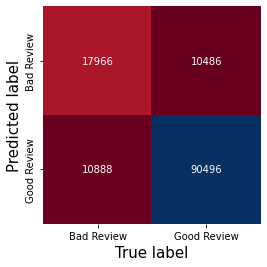

In [11]:
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d', # fmt='d' is a lifesaver. It gets rid of numbers like 1.8e + 02
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [12]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.84
Precision score: 0.90
Recall score: 0.89
F1 score: 0.84


### LogisticRegression

In [13]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfi, y_train)
cv_logreg= logreg.fit(X_train_tfi, y_train)

# predicting test set results 
y_pred = logreg.predict(X_test_tfi)

Text(91.68, 0.5, 'Predicted label')

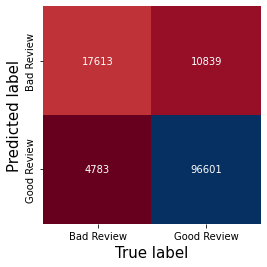

In [14]:
# making the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False, fmt='d',
xticklabels=['Bad Review', 'Good Review'],
yticklabels=['Bad Review', 'Good Review'])
plt.xlabel('True label', fontsize= 15)
plt.ylabel('Predicted label',fontsize= 15)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {0:0.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {0:0.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score: {0:0.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score: {0:0.2f}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy score: 0.88
Precision score: 0.90
Recall score: 0.95
F1 score: 0.88


In [27]:
# Get predicted probabilities for each classifiers from fitted classifiers
y_score1 = cv_gaussian.predict_proba(X_test_tfi)[:,1]
y_score2 = cv_mn.predict_proba(X_test_tfi)[:,1]
y_score3 = cv_ber.predict_proba(X_test_tfi)[:,1]
y_score4 = cv_logreg.predict_proba(X_test_tfi)[:,1]

# Plot Receiving Operating Characteristic Curve
  # Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)

print('roc_auc_score for Gaussian NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score1)))
print('roc_auc_score for Multinominal NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score2)))
print('roc_auc_score for Bernoulli NB: {0:0.2f}'.format (roc_auc_score(y_test, y_score3)))
print('roc_auc_score for Logistic Regression: {0:0.2f}'.format (roc_auc_score(y_test, y_score4)))

roc_auc_score for Gaussian NB: 0.84
roc_auc_score for Multinominal NB: 0.90
roc_auc_score for Bernoulli NB: 0.88
roc_auc_score for Logistic Regression: 0.92


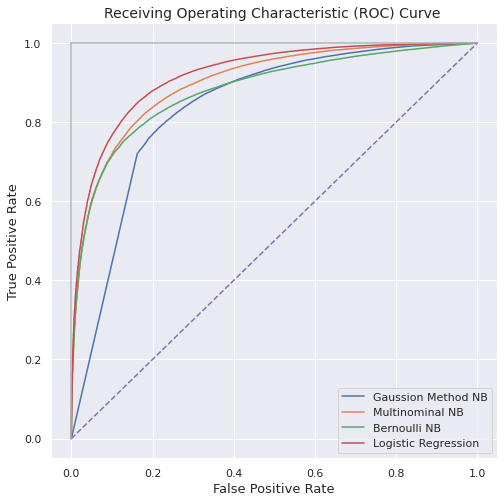

In [30]:
sns.set(style="darkgrid", color_codes=True)
plt.figure(figsize= (8,8))
plt.plot(false_positive_rate1, true_positive_rate1, label="Gaussion Method NB")
plt.plot(false_positive_rate2, true_positive_rate2, label="Multinominal NB")
plt.plot(false_positive_rate3, true_positive_rate3, label="Bernoulli NB")
plt.plot(false_positive_rate4, true_positive_rate4, label="Logistic Regression")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize= 13)
plt.xlabel('False Positive Rate', fontsize= 13)
plt.title('Receiving Operating Characteristic (ROC) Curve ', fontsize= 14)
plt.legend()
plt.show()

Logistic Regression giving good results when compared to other models